In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv("sales_data.csv")
df.head(10)

,order_id,customer_id,order_date,product,category,quantity,price,payment_type,region
0,d52353d7-3601-4612-b153-0be742bb9377,f7da0c5b-23f2-4cd0-8c98-d39a9d49bb68,2024-08-21,Blender,Home,2,211.80,Cash,South
1,a97b56ad-de33-49e6-802d-5a1d258ba415,3a9ef996-c6f3-481d-9dcc-1f675dc599a9,2024-04-27,Blender,Home,3,638.42,Credit Card,South
2,7d1f9510-e349-4475-a204-beb91205e312,4c2c4a88-58b0-4e97-b586-90511e6c7b56,2024-05-22,Headphones,Electronics,1,584.15,Cash,North
3,dcac857a-de47-4d02-ba14-b7cc276fc26c,8688b64f-1157-42d3-a35a-a39eb52d94d6,2024-09-20,Laptop,Electronics,4,813.42,Cash,West
4,0e72d9c6-f785-49e4-b651-9bcb15bf1c89,6bc273bb-68d8-49e6-bece-5430a2a2acb3,2025-01-30,Fiction,Books,5,477.92,Credit Card,East
5,0545f0c1-5152-48d2-915a-31485970508b,044fb5d0-b8cf-4b42-9123-fc9be1ec0b9d,2024-08-03,Comics,Books,2,756.67,Bank Transfer,West
6,69cdea62-dbaa-4400-a5ab-4d0910d1a8ef,373a411d-ca7d-47d5-b850-0c41979bfd9a,2025-04-02,Jacket,Clothing,3,236.96,Credit Card,North
7,00897a12-7836-4c64-a2db-940e436a496f,b7ecdde1-cbb5-4c42-93c5-51ad1ea86ad4,2024-05-25,Smartphone,Electronics,4,480.18,PayPal,East
8,4c9de06d-0ad8-427f-9ea1-6e78b1d83767,746e74a5-c81b-4053-b6db-2dea2339ee71,2024-09-24,T-Shirt,Clothing,2,357.36,Bank Transfer,South
9,67d83b22-56b5-49f6-97e3-4f427dae9315,70553699-5190-42ea-908c-e53d1f879384,2024-07-11,Jeans,Clothing,5,893.85,Cash,North


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      500 non-null    object 
 1   customer_id   500 non-null    object 
 2   order_date    500 non-null    object 
 3   product       500 non-null    object 
 4   category      500 non-null    object 
 5   quantity      500 non-null    int64  
 6   price         500 non-null    float64
 7   payment_type  500 non-null    object 
 8   region        500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [151]:
df["total"]=df["quantity"]*df["price"]
df_ingresosCategory=df.groupby("category")["total"].sum().reset_index()
df_ingresosCategory

,category,total
0,Books,172691.63
1,Clothing,182393.85
2,Electronics,183949.86
3,Home,199876.19


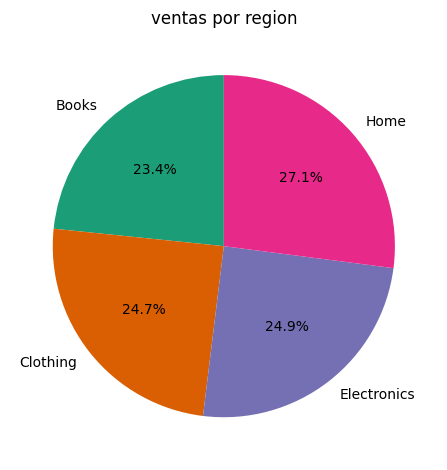

In [152]:
plt.pie("total",labels="category",data=df_ingresosCategory,autopct="%1.1f%%",     # muestra porcentaje
    startangle=90,         # empieza desde arriba
    colors=plt.cm.Dark2.colors)
plt.title("ventas por region")
plt.tight_layout()
plt.show()

### La cotegoria con mas ingresos totales es la de Home

In [141]:
df_ventas=df["region"].value_counts().reset_index()
df_ventas

,region,count
0,North,135
1,East,132
2,South,117
3,West,116


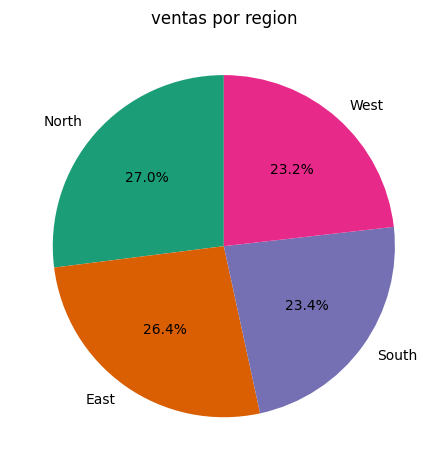

In [150]:
plt.pie("count",labels="region",data=df_ventas,autopct="%1.1f%%",     # muestra porcentaje
    startangle=90,         # empieza desde arriba
    colors=plt.cm.Dark2.colors)
plt.title("ventas por region")
plt.tight_layout()
plt.show()

### La region que genero mas ventas es la North

In [138]:
df["total"]=df["quantity"]*df["price"]
df_ingresosRegion=df.groupby("region")["total"].sum().reset_index()
df_ingresosRegion

,region,total
0,East,187538.24
1,North,192954.55
2,South,177152.47
3,West,181266.27


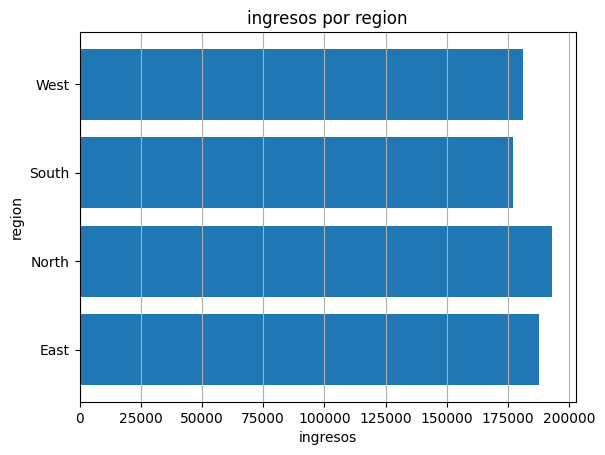

In [140]:
plt.barh("region","total", data=df_ingresosRegion)
plt.xlabel("ingresos")
plt.ylabel("region")
plt.title("ingresos por region")
plt.grid(axis="x")
plt.show()

### La region que genero mas ingresos

In [131]:
df_metodoPago=df["payment_type"].value_counts().reset_index()
df_metodoPago

,payment_type,count
0,Cash,133
1,Bank Transfer,127
2,PayPal,125
3,Credit Card,115


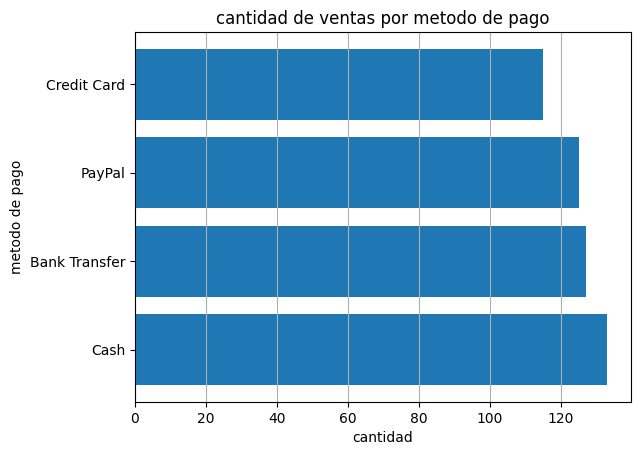

In [139]:
plt.barh("payment_type", "count", data=df_metodoPago)
plt.xlabel("cantidad")
plt.ylabel("metodo de pago")
plt.title("cantidad de ventas por metodo de pago")
plt.grid(axis="x")
plt.show()

### El metodo de pago mas utilizado fue el de Cash

In [85]:
df_g=df.groupby(["region","payment_type"]).size().unstack(fill_value=0)
df_g

payment_type,Bank Transfer,Cash,Credit Card,PayPal
region,,,,
East,35,24,38,35
North,29,47,26,33
South,29,27,26,35
West,34,35,25,22


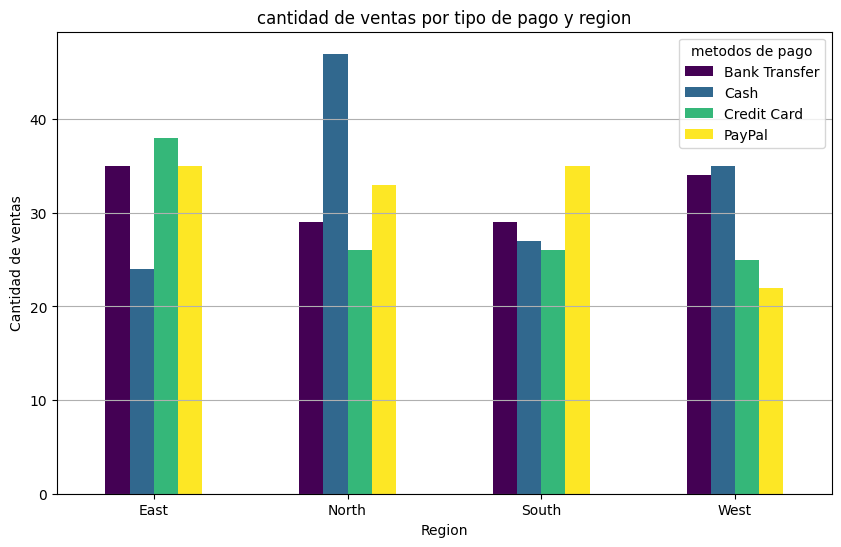

In [134]:
df_g.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.xlabel("Region")
plt.ylabel("Cantidad de ventas")
plt.title("cantidad de ventas por tipo de pago y region")
plt.legend(title="metodos de pago")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

### Los metodos de pago mas utilizados en las distintas regiones

In [124]:
df["total"]= df["quantity"]*df["price"]
df_ingreso= df.groupby(["region","payment_type"])["total"].sum().unstack(fill_value=0)
df_ingreso

payment_type,Bank Transfer,Cash,Credit Card,PayPal
region,,,,
East,46818.52,40761.05,50139.63,49819.04
North,45981.29,63949.55,40189.97,42833.74
South,34939.48,43418.09,47440.11,51354.79
West,43773.17,68990.50,45402.69,23099.91


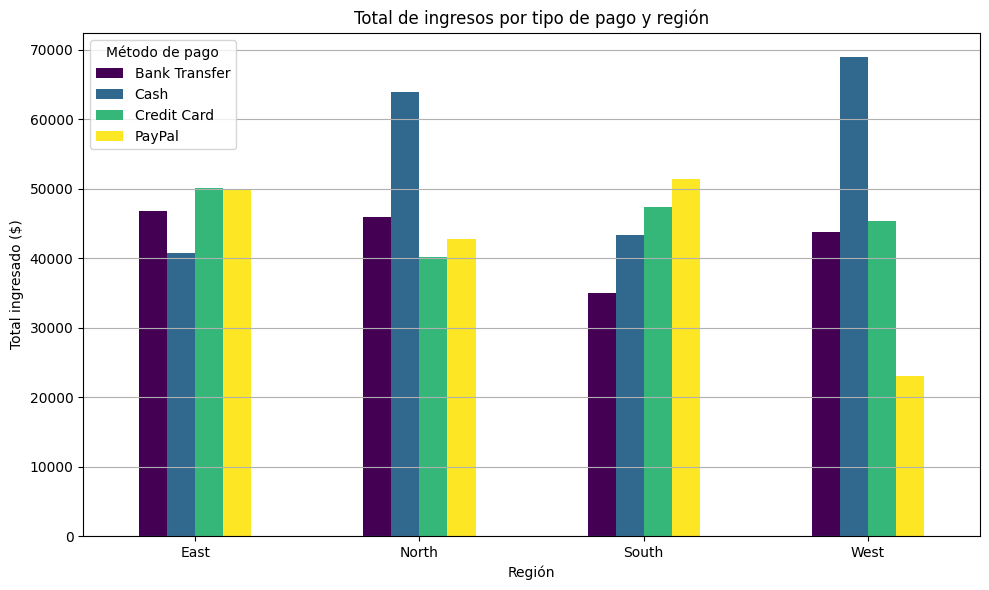

In [125]:
df_ingreso.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Total de ingresos por tipo de pago y región")
plt.xlabel("Región")
plt.ylabel("Total ingresado ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title="Método de pago")
plt.show()

### Los ingresos totales de cada region por su metodo de pago

In [87]:
ticket_promedio=df["total"].mean().round()
print(ticket_promedio)

1478.0


### El ticket promedio por pedido es 1478.0

In [116]:
df_ticket_region=df.groupby("region")["total"].mean().round().reset_index()
df_ticket_region

,region,total
0,East,1421.0
1,North,1429.0
2,South,1514.0
3,West,1563.0


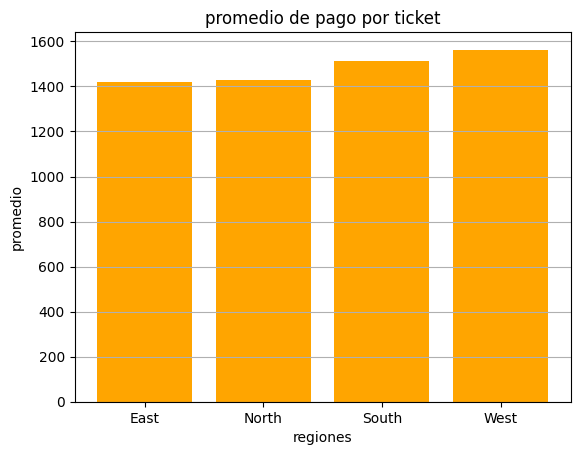

In [118]:
plt.bar("region","total", data=df_ticket_region, color="orange")
plt.xlabel("regiones")
plt.ylabel("promedio")
plt.title("promedio de pago por ticket")
plt.grid(axis="y")
plt.show()

### El ticket promedio por region 

In [109]:
df_ticket_pago=df.groupby("payment_type")["total"].mean().round().reset_index()
df_ticket_pago

,payment_type,total
0,Bank Transfer,1350.0
1,Cash,1632.0
2,Credit Card,1593.0
3,PayPal,1337.0


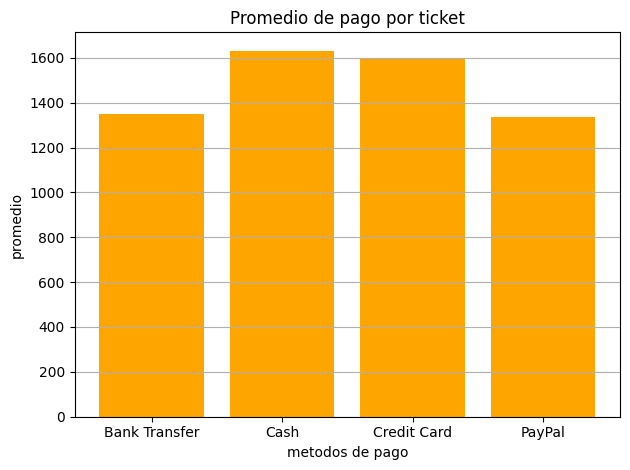

In [119]:
plt.bar("payment_type","total", data=df_ticket_pago, color="orange")
plt.xlabel("metodos de pago")
plt.ylabel("promedio")
plt.title("Promedio de pago por ticket")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

### El ticket promedio por metodo de pago

In [90]:
# cambiamos el tipo de dato de la columna order_date a datetime
df["order_date"]=pd.to_datetime(df["order_date"])
df["order_date"].dtypes

dtype('<M8[ns]')

In [94]:
# Creamos la columna mes para despues poder agrupar 
df["mes"]=df["order_date"].dt.to_period("M")
df_mes=df.groupby("mes")["total"].sum().round().reset_index()
df_mes

,mes,total
0,2024-04,24189.0
1,2024-05,63086.0
2,2024-06,73668.0
3,2024-07,85165.0
4,2024-08,80481.0
5,2024-09,70198.0
6,2024-10,56814.0
7,2024-11,65465.0
8,2024-12,64662.0
9,2025-01,50958.0


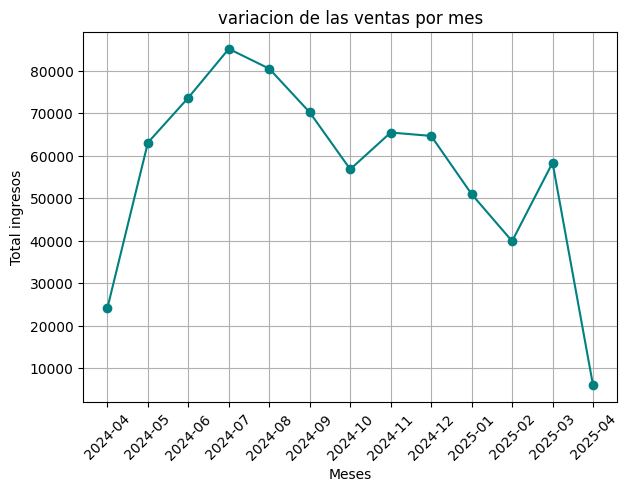

In [101]:
# cambio el tipo de la columna mes de periodico a string para poder graficar
df_mes["mes"] = df_mes["mes"].astype(str)

plt.plot("mes","total",data=df_mes , marker="o", color="teal")
plt.xlabel("Meses")
plt.ylabel("Total ingresos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.title("variacion de las ventas por mes")
plt.show()

### variacion de las ventas por mes

In [98]:
df["trimestre"]=df["order_date"].dt.to_period("Q")
df_trimestral=df.groupby("trimestre")["total"].sum().round().reset_index()
df_trimestral

,trimestre,total
0,2024Q2,160943.0
1,2024Q3,235843.0
2,2024Q4,186941.0
3,2025Q1,149207.0
4,2025Q2,5978.0


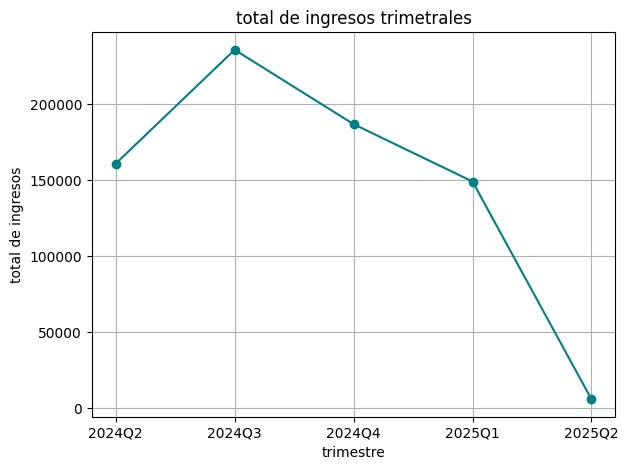

In [115]:
df_trimestral["trimestre"]=df_trimestral["trimestre"].astype(str)
plt.plot("trimestre","total",data=df_trimestral, marker="o", color="teal")
plt.xlabel("trimestre")
plt.ylabel("total de ingresos")
plt.title("total de ingresos trimetrales")
plt.grid(True)
plt.tight_layout()
plt.show()

### Variacion de las ventas por trimestre